/tmp/ipykernel_881/862207728.py:18: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  visualizing.plot_one_neuron_v_s(np.asarray(v_list), np.asarray(s_list), v_threshold=lif.v_threshold, v_reset=lif.v_reset,
/tmp/ipykernel_881/862207728.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  visualizing.plot_one_neuron_v_s(np.asarray(v_list), np.asarray(s_list), v_threshol

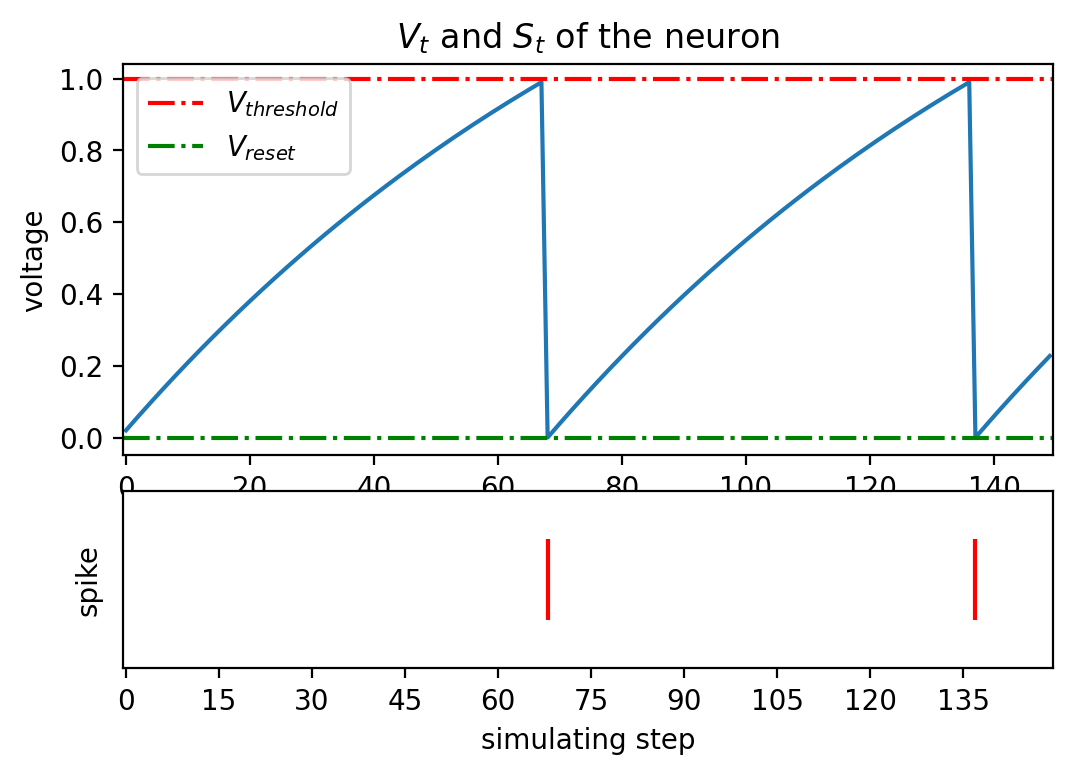

In [9]:
import torch
import torch.nn as nn
import numpy as np
from spikingjelly.clock_driven import neuron
from spikingjelly import visualizing
from matplotlib import pyplot as plt

lif = neuron.LIFNode(tau=100.)
lif.reset()
x = torch.as_tensor([2.])
T = 150
s_list = []
v_list = []
for t in range(T):
    s_list.append(lif(x))
    v_list.append(lif.v)

visualizing.plot_one_neuron_v_s(np.asarray(v_list), np.asarray(s_list), v_threshold=lif.v_threshold, v_reset=lif.v_reset,
                                dpi=200)
plt.show()

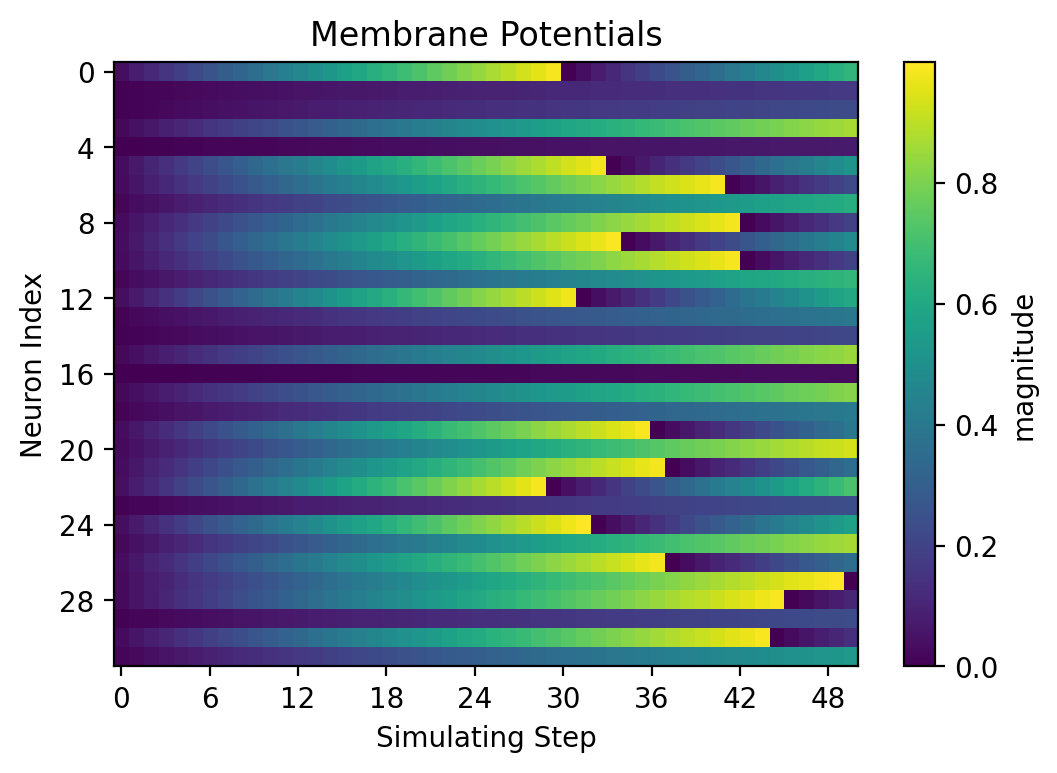

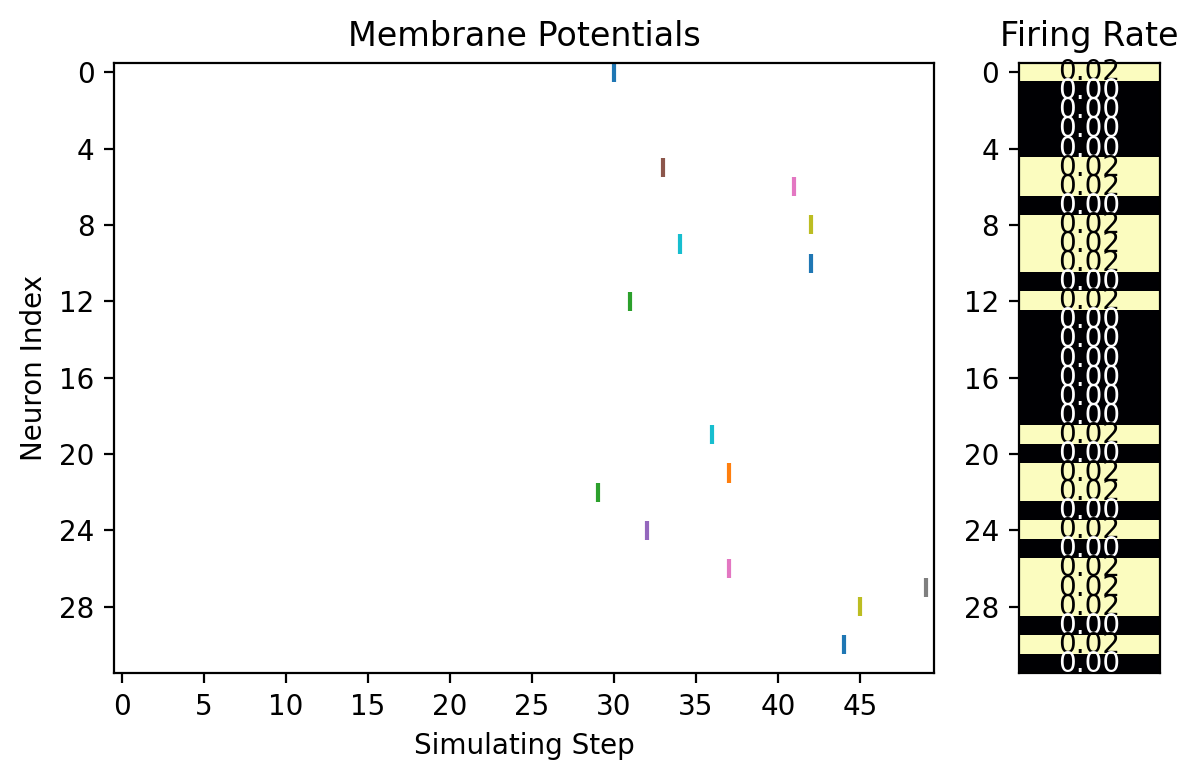

In [10]:
lif.reset()
x = torch.rand(size=[32]) * 4
T = 50
s_list = []
v_list = []
for t in range(T):
    s_list.append(lif(x).unsqueeze(0))
    v_list.append(lif.v.unsqueeze(0))

s_list = torch.cat(s_list)
v_list = torch.cat(v_list)

visualizing.plot_2d_heatmap(array=np.asarray(v_list), title='Membrane Potentials', xlabel='Simulating Step',
                            ylabel='Neuron Index', int_x_ticks=True, x_max=T, dpi=200)
visualizing.plot_1d_spikes(spikes=np.asarray(s_list), title='Membrane Potentials', xlabel='Simulating Step',
                           ylabel='Neuron Index', dpi=200)
plt.show()